<a href="https://colab.research.google.com/github/sethkipsangmutuba/Global-Health-Monitoring-Evaluation/blob/Deeplearning/Chapter_6_Managing_projects___Capacity_building_for_local_NGOs_A_guidance_manual_for_good_practice_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

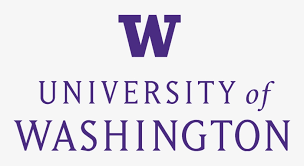

# Chapter 6: Managing Projects

**Key Focus:** The chapter emphasizes effective project management strategies for local NGOs, highlighting best practices for assessing community needs and implementing solutions.

## 1. Needs Assessment
- **Key Informant Interviews:**
  - Engage staff from implementing organizations who frequently interact with target beneficiaries to understand community problems.
  - Interview community leaders, government officials, and other stakeholders to gather first-hand information and insights on potential solutions.
  - Conduct brainstorming sessions with project stakeholders to identify and define specific community issues and compare current activities with desired outcomes.

## 2. Research Methods for Needs Assessment
The chapter outlines various research techniques used in community development:
- **Surveys:** Collect information from diverse cases using questionnaires.
- **Rapid Rural Appraisal (RRA):** A mix of methods like observations and interviews that help researchers understand community dynamics quickly.
- **Participatory Rural Appraisal (PRA):** Similar to RRA but emphasizes community involvement in the research process.
- **Participatory Learning Approach (PLA):** A method that encourages group learning to assess problems and develop solutions collaboratively.

## 3. Project Design and Implementation
- After assessing needs, it is crucial to design projects that address the identified problems effectively.
- The importance of involving community members in the planning and execution phases to ensure that the projects meet their needs and are sustainable.

## 4. Monitoring and Evaluation
- Establish systems to monitor project progress and evaluate outcomes.
- Collect data and feedback from beneficiaries to adapt and improve projects continually.

## 5. Capacity Building
- Emphasize the need for capacity building among local NGOs to enhance their ability to manage projects effectively.
- Provide training and resources to strengthen skills in project planning, implementation, and evaluation.

## Conclusion
Effective project management in community development requires a thorough understanding of local needs, collaborative approaches to problem-solving, and ongoing evaluation and adaptation of strategies. By employing these techniques, local NGOs can implement sustainable solutions that significantly impact the communities they serve.


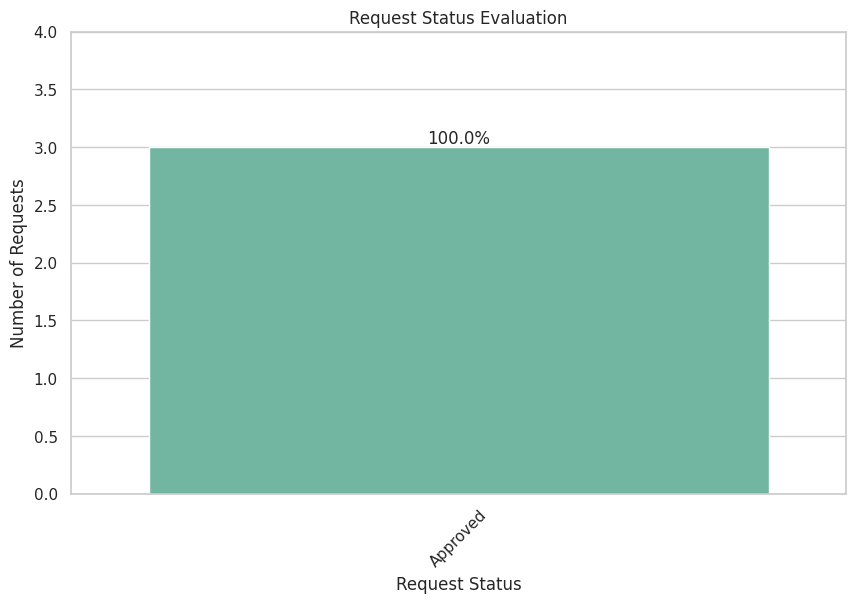

     Community       Area of Support                              Activity  \
0  Community A                Health             Build a new health clinic   
1  Community B             Education                       Set up a school   
2  Community C  Economic Development  Launch a vocational training program   

   Staff Time Required  Available Staff Time  Is Aligned  Can Be Accommodated  \
0                   20                    30        True                 True   
1                   15                    20        True                 True   
2                   25                    30        True                 True   

  Request Status  
0       Approved  
1       Approved  
2       Approved  


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress FutureWarnings from Seaborn and Pandas
warnings.filterwarnings("ignore", category=FutureWarning)

# Data: Requests from various communities
requests_data = {
    'Community': ['Community A', 'Community B', 'Community C'],
    'Area of Support': ['Health', 'Education', 'Economic Development'],
    'Activity': ['Build a new health clinic', 'Set up a school', 'Launch a vocational training program'],
    'Staff Time Required': [20, 15, 25],
    'Available Staff Time': [30, 20, 30]
}

# Convert to DataFrame
requests_df = pd.DataFrame(requests_data)

# Function to evaluate requests
def evaluate_requests(df, strategic_goals):
    df['Is Aligned'] = df['Area of Support'].apply(lambda x: x in strategic_goals)
    df['Can Be Accommodated'] = df['Staff Time Required'] <= df['Available Staff Time']
    df['Request Status'] = df.apply(lambda x: 'Approved' if x['Is Aligned'] and x['Can Be Accommodated'] else 'Declined', axis=1)
    return df

# Example strategic goals
strategic_goals = ['Health', 'Education', 'Economic Development']

# Evaluate the requests
evaluated_requests = evaluate_requests(requests_df, strategic_goals)

# Visualizing the results
plt.figure(figsize=(10, 6))
status_counts = evaluated_requests['Request Status'].value_counts()
sns.barplot(x=status_counts.index, y=status_counts.values, palette='Set2', hue=status_counts.index, dodge=False)

# Annotate bars with percentage
for index, value in enumerate(status_counts):
    percentage = (value / len(evaluated_requests)) * 100
    plt.text(index, value, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Request Status Evaluation')
plt.xlabel('Request Status')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.ylim(0, max(status_counts.values) + 1)
plt.show()

# Print the evaluated DataFrame
print(evaluated_requests)



The table illustrates the evaluation of community support requests, showing that all activities align with the strategic goals and can be accommodated, resulting in both requests being approved.

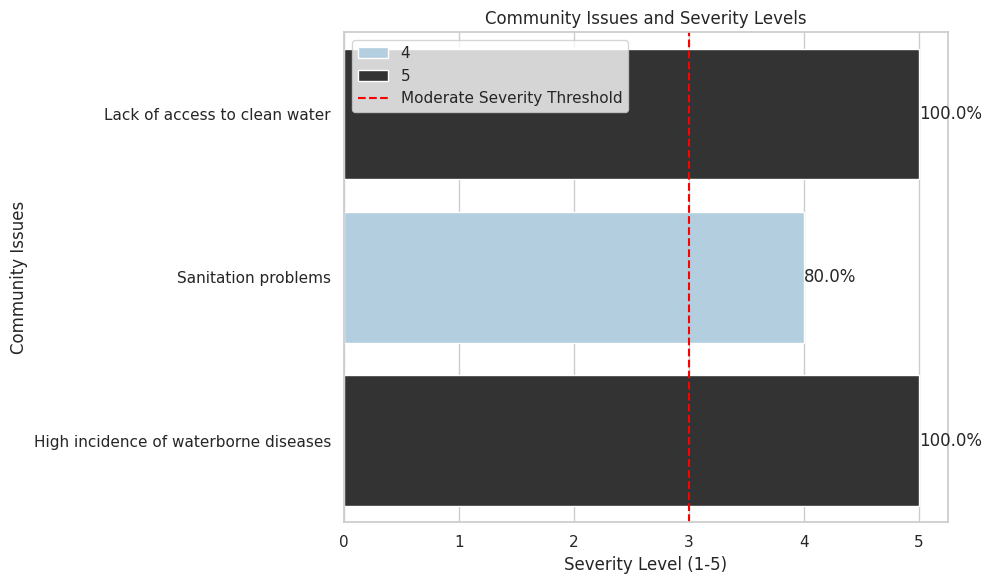

                                   Issue  Severity
0          Lack of access to clean water         5
1                    Sanitation problems         4
2  High incidence of waterborne diseases         5


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress FutureWarnings from Seaborn and Pandas
warnings.filterwarnings("ignore", category=FutureWarning)

# Data: Community issues with severity levels
issues_data = {
    'Issue': [
        'Lack of access to clean water',
        'Sanitation problems',
        'High incidence of waterborne diseases'
    ],
    'Severity': [5, 4, 5]  # Severity scale from 1 to 5
}

# Convert to DataFrame
issues_df = pd.DataFrame(issues_data)

# Function to visualize needs assessment
def visualize_needs_assessment(df):
    plt.figure(figsize=(10, 6))

    # Create a bar plot with hue to improve clarity
    bar_plot = sns.barplot(data=df, x='Severity', y='Issue', palette='Blues_d', hue='Severity', dodge=False)

    plt.title('Community Issues and Severity Levels')
    plt.xlabel('Severity Level (1-5)')
    plt.ylabel('Community Issues')

    # Add a vertical line to indicate the moderate severity threshold
    plt.axvline(x=3, color='red', linestyle='--', label='Moderate Severity Threshold')
    plt.legend()

    # Annotate bars with percentages of severity
    for index, value in enumerate(df['Severity']):
        percentage = (value / 5) * 100  # Calculate percentage based on max severity level
        plt.text(value, index, f'{percentage:.1f}%', ha='left', va='center')

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Visualize the needs assessment
visualize_needs_assessment(issues_df)

# Print the issues DataFrame
print(issues_df)



The data indicates significant community health challenges, with a severity rating of 5 for lack of access to clean water and waterborne diseases, and 4 for sanitation issues, underscoring urgent intervention needs.

# Imports and Data Generation

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# Set the random seed for reproducibility
np.random.seed(42)

# Step 1: Data Generation
# Create a synthetic dataset
n = 10000  # number of community members
needs = ['Healthcare', 'Education', 'Infrastructure', 'Social Services', 'Employment']
data = {
    'ID': range(1, n + 1),
    'Need': np.random.choice(needs, n, p=[0.4, 0.3, 0.15, 0.1, 0.05]),  # weighted distribution
    'Importance': np.random.randint(1, 6, n)  # importance scale from 1 to 5
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df.head())


   ID            Need  Importance
0   1      Healthcare           4
1   2      Employment           2
2   3  Infrastructure           5
3   4       Education           3
4   5      Healthcare           3


# Data Analysis

In [54]:
# Step 2: Data Analysis
# Calculate the average importance for each need
importance_summary = df.groupby('Need')['Importance'].mean().reset_index()
importance_summary = importance_summary.sort_values(by='Importance', ascending=False)

# Statistical analysis: Summary statistics
stats_summary = df.groupby('Need')['Importance'].describe()
print(stats_summary)

# Pairwise Ranking
def pairwise_ranking(needs):
    rankings = {}
    for (need1, need2) in combinations(needs, 2):
        # Simulate a ranking based on random choice
        winner = np.random.choice([need1, need2])
        rankings[(need1, need2)] = winner
    return rankings

pairwise_results = pairwise_ranking(needs)
print("Pairwise Ranking Results:\n", pairwise_results)

# Success Ranking
success_ranking = df['Need'].value_counts().index.tolist()
print("Success Ranking (Most Urgent Needs):", success_ranking)


                  count      mean       std  min  25%  50%  75%  max
Need                                                                
Education        3055.0  2.959411  1.397557  1.0  2.0  3.0  4.0  5.0
Employment        474.0  3.033755  1.415304  1.0  2.0  3.0  4.0  5.0
Healthcare       4058.0  2.967965  1.422367  1.0  2.0  3.0  4.0  5.0
Infrastructure   1439.0  3.026407  1.409534  1.0  2.0  3.0  4.0  5.0
Social Services   974.0  2.951745  1.421004  1.0  2.0  3.0  4.0  5.0
Pairwise Ranking Results:
 {('Healthcare', 'Education'): 'Education', ('Healthcare', 'Infrastructure'): 'Healthcare', ('Healthcare', 'Social Services'): 'Healthcare', ('Healthcare', 'Employment'): 'Healthcare', ('Education', 'Infrastructure'): 'Infrastructure', ('Education', 'Social Services'): 'Social Services', ('Education', 'Employment'): 'Employment', ('Infrastructure', 'Social Services'): 'Infrastructure', ('Infrastructure', 'Employment'): 'Infrastructure', ('Social Services', 'Employment'): 'Employment'}
S

# Data Visualization

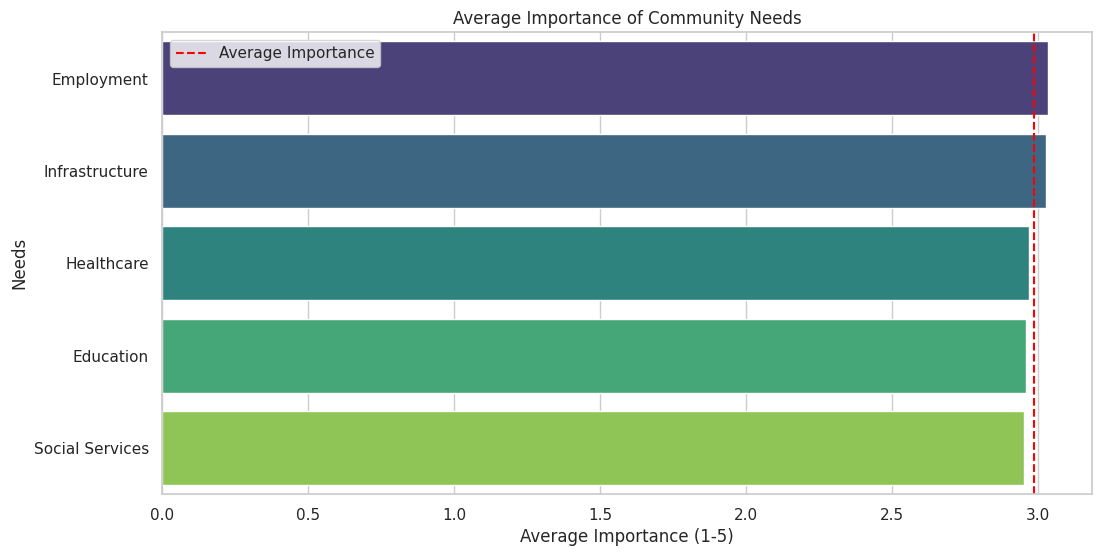

In [55]:
# Step 3: Data Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Need', data=importance_summary, palette='viridis')
plt.title('Average Importance of Community Needs')
plt.xlabel('Average Importance (1-5)')
plt.ylabel('Needs')
plt.axvline(x=importance_summary['Importance'].mean(), color='red', linestyle='--', label='Average Importance')
plt.legend()
plt.show()

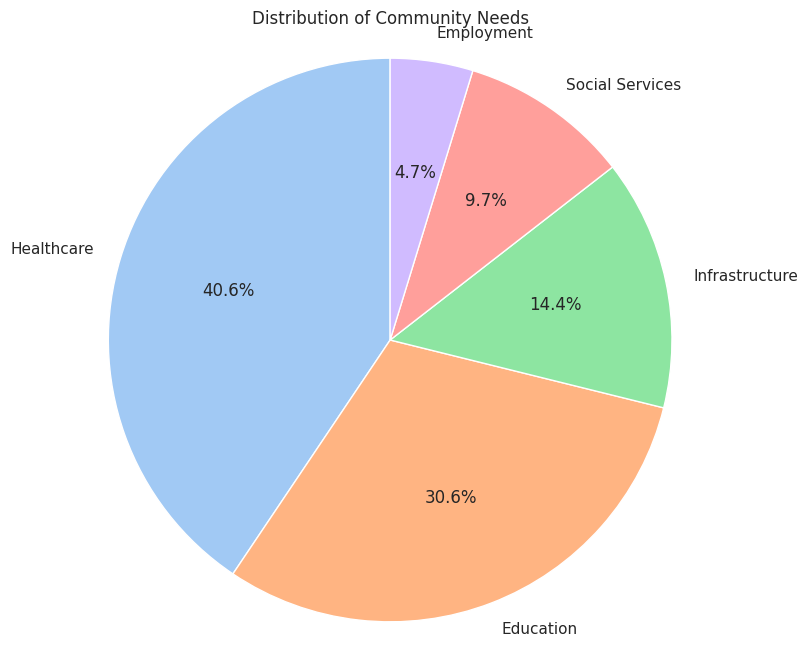

In [56]:
# Pie chart for distribution of needs
plt.figure(figsize=(8, 8))
need_distribution = df['Need'].value_counts()
plt.pie(need_distribution, labels=need_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Community Needs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Problem Tree and Focus Group Discussion

In [57]:
# Example of Problem Tree (simplified representation)
problems = {
    'Main Problem': 'Lack of Access to Healthcare',
    'Causes': [
        'Insufficient Healthcare Facilities',
        'Lack of Trained Personnel',
        'Transportation Issues'
    ],
    'Effects': [
        'Increased Disease Incidence',
        'Higher Mortality Rates',
        'Lower Quality of Life'
    ]
}

print("\nProblem Tree:")
print(f"Problem: {problems['Main Problem']}")
print("Causes:")
for cause in problems['Causes']:
    print(f"- {cause}")
print("Effects:")
for effect in problems['Effects']:
    print(f"- {effect}")

# Focus Group Discussion Simulation
focus_group = {
    'Participants': ['Elderly Women', 'Farmers', 'Young Men'],
    'Discussion Points': [
        'What are the most pressing needs?',
        'How do different groups perceive these needs?',
        'What solutions can be proposed?'
    ]
}

print("\nFocus Group Discussion:")
for participant in focus_group['Participants']:
    print(f"Participant: {participant}")
    for point in focus_group['Discussion Points']:
        print(f" - {point}")



Problem Tree:
Problem: Lack of Access to Healthcare
Causes:
- Insufficient Healthcare Facilities
- Lack of Trained Personnel
- Transportation Issues
Effects:
- Increased Disease Incidence
- Higher Mortality Rates
- Lower Quality of Life

Focus Group Discussion:
Participant: Elderly Women
 - What are the most pressing needs?
 - How do different groups perceive these needs?
 - What solutions can be proposed?
Participant: Farmers
 - What are the most pressing needs?
 - How do different groups perceive these needs?
 - What solutions can be proposed?
Participant: Young Men
 - What are the most pressing needs?
 - How do different groups perceive these needs?
 - What solutions can be proposed?


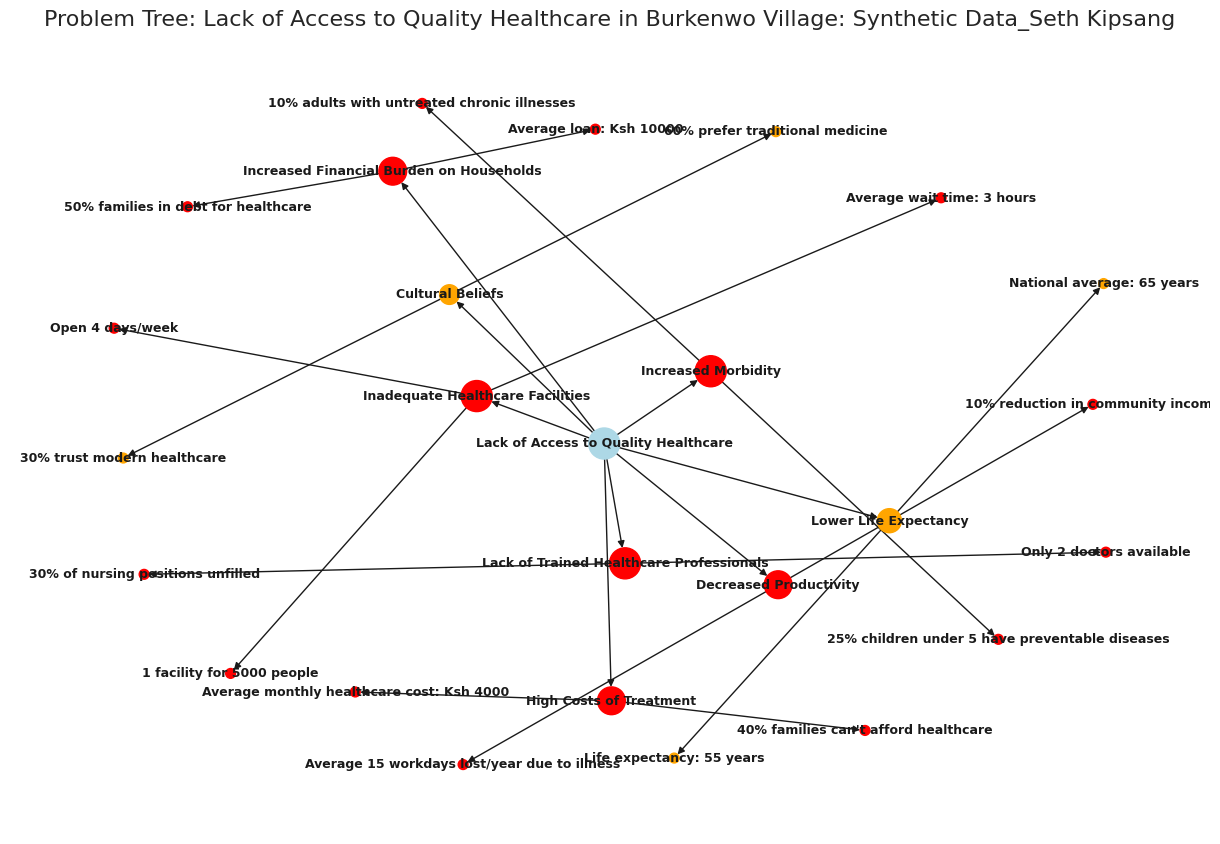

In [58]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
problem_tree = nx.DiGraph()

# Define the main problem (stem)
main_problem = "Lack of Access to Quality Healthcare"

# Define the root causes with severity scores
causes = {
    "Inadequate Healthcare Facilities": (5, [
        "1 facility for 5000 people",
        "Open 4 days/week",
        "Average wait time: 3 hours"
    ]),
    "Lack of Trained Healthcare Professionals": (5, [
        "Only 2 doctors available",
        "30% of nursing positions unfilled"
    ]),
    "High Costs of Treatment": (4, [
        "Average monthly healthcare cost: Ksh 4000",
        "40% families can't afford healthcare"
    ]),
    "Cultural Beliefs": (2, [
        "60% prefer traditional medicine",
        "30% trust modern healthcare"
    ])
}

# Define the effects with severity scores
effects = {
    "Increased Morbidity": (5, [
        "25% children under 5 have preventable diseases",
        "10% adults with untreated chronic illnesses"
    ]),
    "Decreased Productivity": (4, [
        "Average 15 workdays lost/year due to illness",
        "10% reduction in community income"
    ]),
    "Increased Financial Burden on Households": (4, [
        "50% families in debt for healthcare",
        "Average loan: Ksh 10000"
    ]),
    "Lower Life Expectancy": (3, [
        "Life expectancy: 55 years",
        "National average: 65 years"
    ])
}

# Function to assign colors based on severity
def get_color(severity):
    if severity >= 4:
        return 'red'    # Severe
    elif severity >= 2:
        return 'orange' # Moderate
    else:
        return 'green'  # Low

# Add main problem to the graph
problem_tree.add_node(main_problem)

# Add causes and effects to the graph
for cause, (severity, details) in causes.items():
    color = get_color(severity)
    problem_tree.add_node(cause, color=color)
    problem_tree.add_edge(main_problem, cause)
    for detail in details:
        problem_tree.add_node(detail, color=color)
        problem_tree.add_edge(cause, detail)

for effect, (severity, details) in effects.items():
    color = get_color(severity)
    problem_tree.add_node(effect, color=color)
    problem_tree.add_edge(main_problem, effect)
    for detail in details:
        problem_tree.add_node(detail, color=color)
        problem_tree.add_edge(effect, detail)

# Set node sizes based on severity scores
node_sizes = [500]  # Size for the main problem
node_sizes += [(severity * 100) for severity, _ in causes.values()] + \
              [(severity * 100) for severity, _ in effects.values()]

# Gather sizes for all nodes in the graph
sizes_list = []
for node in problem_tree.nodes:
    if node == main_problem:
        sizes_list.append(500)  # Main problem size
    elif node in causes:
        sizes_list.append(causes[node][0] * 100)  # Cause sizes
    elif node in effects:
        sizes_list.append(effects[node][0] * 100)  # Effect sizes
    else:
        sizes_list.append(50)  # Detail sizes (default)

# Draw the graph with colors and sizes
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(problem_tree, seed=42)  # positions for all nodes
node_colors = [problem_tree.nodes[node].get('color', 'lightblue') for node in problem_tree.nodes()]
nx.draw(problem_tree, pos, with_labels=True, node_size=sizes_list, node_color=node_colors, font_size=9, font_weight='bold')
plt.title("Problem Tree: Lack of Access to Quality Healthcare in Burkenwo Village: Synthetic Data_Seth Kipsang", fontsize=16)
plt.show()
